# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)  Capstone Project:  "Does Wealth = Health?"
*Predicting health based on indicators of financial wellbeing*


## Technical Report:   *2016 Financial Wellbeing Survey Data*
This notebook --just one component of the overall project-- reflects the collection, import and cleaning of datasets. 


---
## Data Import and Cleaning

In [1]:
# Import basic Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
# load data into dataframe from .csv file exported in the previous notebook. . .

#Adjust the path to where you have saved the data
df_cfpb = pd.read_csv("../data/NFWBS_PUF_2016_data_export.csv")


In [5]:
df_cfpb.shape

(6394, 217)

In [6]:
df_cfpb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Columns: 217 entries, PUF_ID to finalwt
dtypes: float64(2), int64(2), object(213)
memory usage: 10.6+ MB


In [7]:
# df.isnull().sum()
df_cfpb.isnull().sum().value_counts()

0    217
dtype: int64

In [8]:
# only 4 numerical features
df_cfpb.describe()


,PUF_ID,LMscore,KHscore,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000
mean,10892.392712,2.506256,-0.056935,1.000000
std,1967.854493,0.755215,0.814936,0.585406
min,7123.000000,0.000000,-2.053000,0.165567
25%,9235.250000,2.000000,-0.570000,0.600582
50%,10901.500000,3.000000,-0.188000,0.845213
75%,12570.750000,3.000000,0.712000,1.251415
max,14400.000000,3.000000,1.267000,6.638674


In [11]:
# some scores are missing; need to be converted to numbers...
print(df_cfpb['FWBscore'].dtypes)
print(df_cfpb['FSscore'].dtypes)

object
object


In [12]:
# 213 categorical features!!
df_cfpb.dtypes.value_counts()

object     213
int64        2
float64      2
dtype: int64

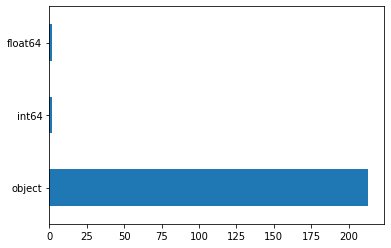

In [13]:
# plot dtypes
df_cfpb.dtypes.value_counts().plot(kind='barh', rot=0);

In [14]:
df_cfpb.head().T

,0,1,2,3,4
PUF_ID,10350,7740,13699,7267,7375
sample,Age 62+ oversample,General population,General population,General population,General population
fpl,200%+ FPL,200%+ FPL,200%+ FPL,200%+ FPL,200%+ FPL
SWB_1,5,6,4,6,4
SWB_2,5,6,3,6,4
SWB_3,6,6,4,6,4
FWBscore,55,51,49,49,49
FWB1_1,Somewhat,Very little,Somewhat,Somewhat,Somewhat
FWB1_2,Somewhat,Very little,Somewhat,Somewhat,Somewhat
FWB1_3,Somewhat,Somewhat,Somewhat,Somewhat,Somewhat


In [28]:
cols = [df_cfpb.columns]
cols

[Index(['PUF_ID', 'sample', 'fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FWBscore',
        'FWB1_1', 'FWB1_2', 'FWB1_3',
        ...
        'PPMSACAT', 'PPREG4', 'PPREG9', 'PPT01', 'PPT25', 'PPT612', 'PPT1317',
        'PPT18OV', 'PCTLT200FPL', 'finalwt'],
       dtype='object', length=217)]

In [23]:
df_cols = pd.DataFrame(df_cfpb.columns)
df_cols.T

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,216
0,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt


## Next . . . 

 - feature selection (y):  deciding on a target
 - feature selection (X):  intuition / "eyeball" strategy
 - feature selection (X):  correlation / heatmap strategy
 - dealing with categorical variables

In [17]:
# Is HEALTH a good y target?  **MULTI-CLASS**
print(df_cfpb['HEALTH'].unique())
print('--------------------------')
print(df_cfpb['HEALTH'].describe())
print('--------------------------')
# only a small percentage (15%) report less than good health. . .
print(df_cfpb['HEALTH'].value_counts())


['Fair' 'Good' 'Refused' 'Excellent' 'Very good' 'Poor']
--------------------------
count          6394
unique            6
top       Very good
freq           2583
Name: HEALTH, dtype: object
--------------------------
Very good    2583
Good         2139
Fair          781
Excellent     684
Poor          154
Refused        53
Name: HEALTH, dtype: int64


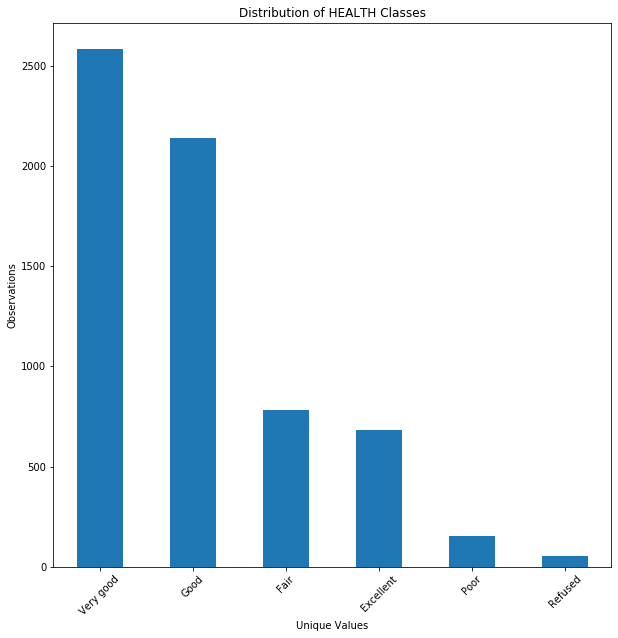

In [68]:
# plot distribution of HEALTH classes
# classes are imbalanced
plt.figure(figsize=(10,10))

df_cfpb['HEALTH'].value_counts().plot(kind='bar', rot=0);
# Add a title and show the plot.
plt.title('Distribution of HEALTH Classes')
# Create tick mark labels on the Y axis and rotate them.
plt.xticks(rotation = 45)
# Create X axis label.
plt.xlabel("Unique Values")
# Create Y axis label.
plt.ylabel("Observations");

In [18]:
# Can we predict financial welbeing (score ranges?) based on U.S. region?

# IS FWBscore a good y target?
print(df_cfpb['PPREG4'].unique())
print('--------------------------')
print(df_cfpb['PPREG4'].describe())
print('--------------------------')
# relatively balanced categories. . .
print(df_cfpb['PPREG4'].value_counts())


['West' 'Midwest' 'South' 'Northeast']
--------------------------
count      6394
unique        4
top       South
freq       2257
Name: PPREG4, dtype: object
--------------------------
South        2257
West         1514
Midwest      1461
Northeast    1162
Name: PPREG4, dtype: int64


## Potential predictors...

In [19]:
# "eyeballing" potential predictors . . .
# descriptors for all features are listed the "Variable List" section of the CFPB Codebook:
# https://files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

cols_list = [
# Financial well-being scale score
             'FWBscore',
# Financial skill scale score
             'FSscore',
# Lusardi and Mitchell financial knowledge scale score
             'LMscore', 
# Knoll and Houts financial knowledge scale score
             'KHscore',
             'agecat','generation',
             'PPGENDER','PPMARIT', 'PPETHM',
# ===================================
#   . . .
             'HEALTH',
             'MEMLOSS','DISTRESS','LIFEEXPECT',
#   Had a health emergency
             'SHOCKS_5',
#   Health Insurance
             'BENEFITS_1',

# Any household member couldn't afford to see doctor or go to hospital
             'MATHARDSHIP_4',
# Any household member couldn't stopped taking medication or took less due to costs
             'MATHARDSHIP_5',

# Psychological connectedness
             'CONNECT',

# ===================================
# Belief that ability to manage money is NOT changeable
             'CHANGEABLE',
# Confidence in own ability to achieve financial goals
             'GOALCONF',
# Do you have a current or recent financial goal?
             'FINGOALS',
# Everyone has a fair chance at moving up
             'PEM',

             #'OBJNUMERACY1',
#   Self-employed
             'EMPLOY1_1', 
#   Work full-time for an employer or the military
             'EMPLOY1_2', 
             'OUTLOOK_1','OUTLOOK_2',
# The INTERCONNECTIONS variables reflect responses to the question “Do you seek advice on matters involving money from any of the following types of people or organizations?”
             'INTERCONNECTIONS_1','INTERCONNECTIONS_2','INTERCONNECTIONS_3',
             'INTERCONNECTIONS_4','INTERCONNECTIONS_5','INTERCONNECTIONS_6',
             'INTERCONNECTIONS_10',
            'ENDSMEET', 'HOUSING','LIVINGARRANGEMENT',
            'IMPUTATION_FLAG',
             # 'HOUSERANGES', 'VALUERANGES','MORTGAGE','SAVINGSRANGES',
            'EARNERS','VOLATILITY',
             'Military_Status',
             'PPREG4','PPREG9','PPMSACAT',
# Where did you live at age 17?
             'HSLOC'
            ]

# This list is down to 44 features (from 217)
print(df_cfpb[cols_list].shape)
print(df_cfpb[cols_list].dtypes)

df_cfpb[cols_list].head().T

(6394, 44)
FWBscore                object
FSscore                 object
LMscore                  int64
KHscore                float64
agecat                  object
generation              object
PPGENDER                object
PPMARIT                 object
PPETHM                  object
HEALTH                  object
MEMLOSS                 object
DISTRESS                object
LIFEEXPECT              object
SHOCKS_5                object
BENEFITS_1              object
MATHARDSHIP_4           object
MATHARDSHIP_5           object
CONNECT                 object
CHANGEABLE              object
GOALCONF                object
FINGOALS                object
PEM                     object
EMPLOY1_1               object
EMPLOY1_2               object
OUTLOOK_1               object
OUTLOOK_2               object
INTERCONNECTIONS_1      object
INTERCONNECTIONS_2      object
INTERCONNECTIONS_3      object
INTERCONNECTIONS_4      object
INTERCONNECTIONS_5      object
INTERCONNECTIONS_6      obje

,0,1,2,3,4
FWBscore,55,51,49,49,49
FSscore,44,43,42,42,42
LMscore,3,3,3,2,1
KHscore,1.267,-0.57,-0.188,-1.485,-1.9
agecat,75+,35-44,35-44,35-44,25-34
generation,Pre-Boomer,Gen X,Gen X,Gen X,Millennial
PPGENDER,Male,Male,Male,Male,Male
PPMARIT,Divorced/Separated,Divorced/Separated,Divorced/Separated,Divorced/Separated,Married
PPETHM,"White, Non-Hispanic","White, Non-Hispanic","Black, Non-Hispanic","White, Non-Hispanic","Other, Non-Hispanic"
HEALTH,Fair,Good,Good,Refused,Good


In [29]:
# Is Self-employed a good predictor?

print(df_cfpb['EMPLOY1_1'].unique())
print('--------------------------')
print(df_cfpb['EMPLOY1_1'].describe())
print('--------------------------')
# only a small percentage (8%) report being Self-employed. . .
print(df_cfpb['EMPLOY1_1'].value_counts())


['No' 'Yes']
--------------------------
count     6394
unique       2
top         No
freq      5858
Name: EMPLOY1_1, dtype: object
--------------------------
No     5858
Yes     536
Name: EMPLOY1_1, dtype: int64


In [30]:
# Is Work full-time for an employer or the military a good predictor?

print(df_cfpb['EMPLOY1_2'].unique())
print('--------------------------')
print(df_cfpb['EMPLOY1_2'].describe())
print('--------------------------')
# . . .
print(df_cfpb['EMPLOY1_2'].value_counts())


['No' 'Yes']
--------------------------
count     6394
unique       2
top         No
freq      3879
Name: EMPLOY1_2, dtype: object
--------------------------
No     3879
Yes    2515
Name: EMPLOY1_2, dtype: int64


In [31]:
# Is Belief that ability to manage money is NOT changeable a predictor?

print(df_cfpb['CHANGEABLE'].unique())
print('--------------------------')
print(df_cfpb['CHANGEABLE'].describe())
print('--------------------------')
# . . .
print(df_cfpb['CHANGEABLE'].value_counts())


['Neither agree nor disagree' 'Disagree' 'Agree' 'Refused'
 'Strongly disagree' 'Somewhat agree' 'Somewhat disagree' 'Strongly agree']
--------------------------
count                           6394
unique                             8
top       Neither agree nor disagree
freq                            1342
Name: CHANGEABLE, dtype: object
--------------------------
Neither agree nor disagree    1342
Somewhat agree                1307
Disagree                      1148
Somewhat disagree             1131
Agree                          722
Strongly disagree              483
Strongly agree                 223
Refused                         38
Name: CHANGEABLE, dtype: int64


In [32]:
# Is Confidence in own ability to achieve financial goals a good predictor?

print(df_cfpb['GOALCONF'].unique())
print('--------------------------')
print(df_cfpb['GOALCONF'].describe())
print('--------------------------')
# . . .
print(df_cfpb['GOALCONF'].value_counts())


['Somewhat confident' 'Refused' 'Very confident' 'Not very confident'
 'Not at all confident']
--------------------------
count                   6394
unique                     5
top       Somewhat confident
freq                    3035
Name: GOALCONF, dtype: object
--------------------------
Somewhat confident      3035
Very confident          2467
Not very confident       735
Not at all confident     129
Refused                   28
Name: GOALCONF, dtype: int64


In [33]:
# Is Do you have a current or recent financial goal? a good predictor?

print(df_cfpb['FINGOALS'].unique())
print('--------------------------')
print(df_cfpb['FINGOALS'].describe())
print('--------------------------')
# . . .
print(df_cfpb['FINGOALS'].value_counts())


['Yes' 'No' 'Refused']
--------------------------
count     6394
unique       3
top        Yes
freq      4049
Name: FINGOALS, dtype: object
--------------------------
Yes        4049
No         2269
Refused      76
Name: FINGOALS, dtype: int64


In [34]:
# sample breakdown
df_cfpb['sample'].value_counts()


General population                       5000
Age 62+ oversample                        999
Race/ethnicity and poverty oversample     395
Name: sample, dtype: int64

In [35]:
# poverty status
df_cfpb['fpl'].value_counts()


200%+ FPL        4874
100%-199% FPL     859
<100% FPL         661
Name: fpl, dtype: int64

In [36]:
# I am satisfied with my life
df_cfpb['SWB_1'].value_counts()


6                                   1926
7 Strongly agree                    1535
5                                   1458
4                                    803
3                                    335
1 Strongly disagree                  154
2                                    152
Refused                               30
Response not written to database       1
Name: SWB_1, dtype: int64

In [37]:
# I could handle a major unexpected expense
df_cfpb['FWB1_1'].value_counts()


Somewhat                            2103
Very well                           1531
Very little                          989
Not at all                           927
Completely                           833
Refused                               10
Response not written to database       1
Name: FWB1_1, dtype: int64

In [38]:
# I know where to find the advice I need to make decisions involving money
df_cfpb['FS1_2'].value_counts()


Very well      2230
Somewhat       2025
Completely     1209
Very little     655
Not at all      264
Refused          11
Name: FS1_2, dtype: int64

In [39]:
# I struggle to understand financial information
df_cfpb['FS2_3'].value_counts()


Sometimes    2681
Rarely       2227
Often         711
Never         515
Always        246
Refused        14
Name: FS2_3, dtype: int64

In [40]:
# Understanding of credit card minimum payments
df_cfpb['KHKNOWL7'].value_counts()


Never, you will continue to be in debt    2809
Between 10 and 15 years                   1934
Between 5 and 10 years                    1329
Less than 5 years                          282
Refused                                     40
Name: KHKNOWL7, dtype: int64

In [41]:
df_cfpb['HOUSING'].value_counts()


I own my home                     4164
I rent                            1643
I do not currently own or rent     545
Refused                             42
Name: HOUSING, dtype: int64

In [42]:
# Health Insurance
df_cfpb['PRODHAVE_3'].value_counts()


Yes    4558
No     1836
Name: PRODHAVE_3, dtype: int64

In [43]:
# Student/Education Loan (for yourself or someone else)
df_cfpb['PRODHAVE_8'].value_counts()


No     5485
Yes     909
Name: PRODHAVE_8, dtype: int64

In [44]:
# Household members currently contributing to paying household bills
df_cfpb['EARNERS'].value_counts()


Two              3532
One              2442
More than two     342
Refused            78
Name: EARNERS, dtype: int64

In [45]:
# Household income volatility
df_cfpb['VOLATILITY'].value_counts()


Roughly the same each month                                                            4613
Roughly the same most months, but some unusually high or low months during the year    1303
Often varies quite a bit from one month to the next                                     414
Refused                                                                                  64
Name: VOLATILITY, dtype: int64

In [46]:
# Any household member received SNAP benefits
df_cfpb['SNAP'].value_counts()


No          5618
Yes          614
Not sure     114
Refused       48
Name: SNAP, dtype: int64

# dealing with categorical variables... 
---

# pd.get_dummies

In [47]:
# look at catagories
# Do you have current or recent financial goal?
print('FINGOALS')
print(df_cfpb['FINGOALS'].value_counts())


FINGOALS
Yes        4049
No         2269
Refused      76
Name: FINGOALS, dtype: int64


In [48]:
# One-hot encoding is where you represent each possible value for a category as a separate feature.
# this will create one new feature for each value!! (too many columns...)
df_fingoals = pd.get_dummies(df_cfpb['FINGOALS'])
df_fingoals.head()


,No,Refused,Yes
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


# sklearn.preprocessing LabelEncoder

In [49]:
from sklearn.preprocessing import LabelEncoder


In [50]:
# Numeric encoding - from sklearn.preprocessing import LabelEncoder
df_cfpb['FINGOALS_encoded'] = LabelEncoder().fit_transform(df_cfpb['FINGOALS'])
df_cfpb[['FINGOALS', 'FINGOALS_encoded']].head() # special syntax to get just these two columns


,FINGOALS,FINGOALS_encoded
0,Yes,2
1,No,0
2,Yes,2
3,Refused,1
4,Yes,2


In [51]:
# We can take a closer look at what the LabelEncoder is doing 
# (and keep it to apply to a predict dataset) as follows:

encoder = LabelEncoder()
encoder.fit(df_cfpb['FINGOALS'])
encoder.classes_

array(['No', 'Refused', 'Yes'], dtype=object)

In [52]:
# The ordering of the list of classes aboves corresponds to their numeric values. 
# Transformation is then as follows:

df_cfpb['FINGOALS_encoded'] = encoder.transform(df_cfpb['FINGOALS']) # transform as a separate step from fit
df_cfpb[['FINGOALS', 'FINGOALS_encoded']].head()


,FINGOALS,FINGOALS_encoded
0,Yes,2
1,No,0
2,Yes,2
3,Refused,1
4,Yes,2
